In [14]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('/home/user/Desktop/OJT-Study/python/PE-Header/preprocessed_data.csv', sep='|')

In [16]:
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,label
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,0
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,0
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,0
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,0
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,0


In [17]:
data.drop(columns = ['Name', 'md5'], inplace = True)

In [18]:
data.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,label
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,0
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,0
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,0
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,0
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Machine                      138047 non-null  int64  
 1   SizeOfOptionalHeader         138047 non-null  int64  
 2   Characteristics              138047 non-null  int64  
 3   MajorLinkerVersion           138047 non-null  int64  
 4   MinorLinkerVersion           138047 non-null  int64  
 5   SizeOfCode                   138047 non-null  int64  
 6   SizeOfInitializedData        138047 non-null  int64  
 7   SizeOfUninitializedData      138047 non-null  int64  
 8   AddressOfEntryPoint          138047 non-null  int64  
 9   BaseOfCode                   138047 non-null  int64  
 10  BaseOfData                   138047 non-null  int64  
 11  ImageBase                    138047 non-null  float64
 12  SectionAlignment             138047 non-null  int64  
 13 

In [20]:
!pip install scikit-learn -q


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = data['label']
X = data.drop(columns = ['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [22]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
result = rf_classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
print("Random Forest Classifier model")
print("Accuracy: ", accuracy_score(y_test, result))
print(confusion_matrix(y_test, result))
print(classification_report(y_test, result))

Random Forest Classifier model
Accuracy:  0.9951829047446578
[[ 8206    59]
 [   74 19271]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8265
           1       1.00      1.00      1.00     19345

    accuracy                           1.00     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       1.00      1.00      1.00     27610



In [26]:
!pip install matplotlib -q


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


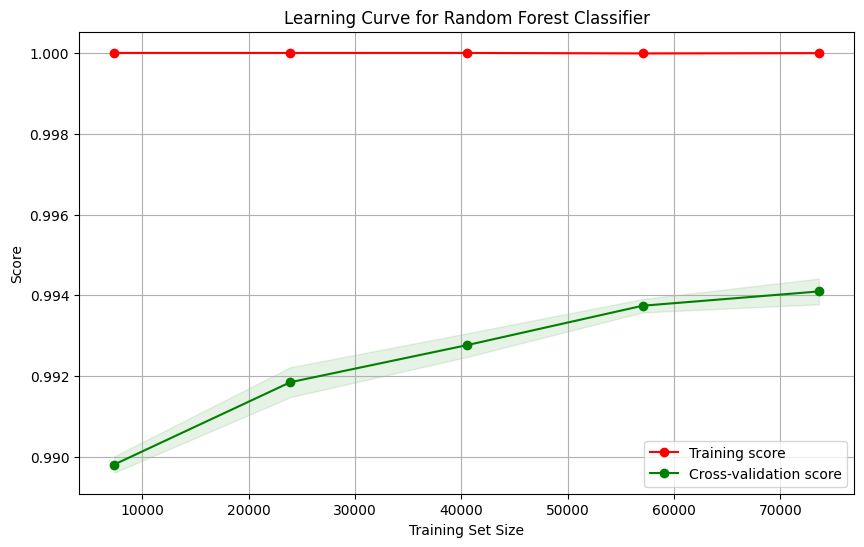

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(
    train_sizes, 
    train_scores_mean - train_scores_std, 
    train_scores_mean + train_scores_std, 
    alpha=0.1, color="r"
)
plt.fill_between(
    train_sizes, 
    test_scores_mean - test_scores_std, 
    test_scores_mean + test_scores_std, 
    alpha=0.1, color="g"
)

plt.title("Learning Curve for Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [29]:
!pip install pefile -q


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [30]:
import pefile
import hashlib

def get_entropy(data):
    if len(data) == 0:
        return 0.0
    occurences = array.array('L', [0]*256)
    for x in data:
        occurences[x if isinstance(x, int) else ord(x)] += 1
    entropy = 0
    for x in occurences:
        if x:
            p_x = float(x) / len(data)
            entropy -= p_x*math.log(p_x, 2)
    return entropy

def get_resources(pe):
    """Extract resources :
    [entropy, size]"""
    resources = []
    if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, 'directory'):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, 'directory'):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData, resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = get_entropy(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources


def get_version_info(pe):
    """Return version infos"""
    res = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == 'StringFileInfo':
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    res[entry[0]] = entry[1]
        if fileinfo.Key == 'VarFileInfo':
            for var in fileinfo.Var:
                res[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe, 'VS_FIXEDFILEINFO'):
        res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
        res['os'] = pe.VS_FIXEDFILEINFO.FileOS
        res['type'] = pe.VS_FIXEDFILEINFO.FileType
        res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
        res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
        res['signature'] = pe.VS_FIXEDFILEINFO.Signature
        res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
    return res



def extract_infos(fpath=None, already_pe=None, inference=None):
    res = {}

    try:
        if fpath != None:
            pe = pefile.PE(fpath)
        else:
            pe = already_pe[1]
    except FileNotFoundError as e:
        print(f"File not found: {fpath}")
    except pefile.PEFormatError as e:
        print(f"PEFormatError: {fpath} does not appear to ba a PE file.")
        print("Error : ", e)
        return

    if fpath!=None and inference==None:
        res['md5'] = file_to_md5(fpath)
    elif already_pe!=None:
        res['md5'] = already_pe[0]

    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0
    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
    res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
    res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
    res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
    res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
    res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
    res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

       # Sections
    res['SectionsNb'] = len(pe.sections)
    entropy = list(map(lambda x:x.get_entropy(), pe.sections))
    res['SectionsMeanEntropy'] = sum(entropy)/float(len(entropy))
    res['SectionsMinEntropy'] = min(entropy)
    res['SectionsMaxEntropy'] = max(entropy)
    raw_sizes = list(map(lambda x:x.SizeOfRawData, pe.sections))
    res['SectionsMeanRawsize'] = sum(raw_sizes)/float(len(raw_sizes))
    res['SectionsMinRawsize'] = min(raw_sizes)
    res['SectionsMaxRawsize'] = max(raw_sizes)
    virtual_sizes = list(map(lambda x:x.Misc_VirtualSize, pe.sections))
    res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(len(virtual_sizes))
    res['SectionsMinVirtualsize'] = min(virtual_sizes)
    res['SectionMaxVirtualsize'] = max(virtual_sizes)
    
        #Imports
    try:
        res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
        imports = sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], [])
        res['ImportsNb'] = len(imports)
        res['ImportsNbOrdinal'] = len(list(filter(lambda x:x.name is None, imports)))
    except AttributeError:
        res['ImportsNbDLL'] = 0
        res['ImportsNb'] = 0
        res['ImportsNbOrdinal'] = 0

    #Exports
    try:
        res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
    except AttributeError:
        # No export
        res['ExportNb'] = 0
    #Resources
    resources= get_resources(pe)
    res['ResourcesNb'] = len(resources)

    if len(resources)> 0:
        entropy = list(map(lambda x:x[0], resources))
        res['ResourcesMeanEntropy'] = sum(entropy)/float(len(entropy))
        res['ResourcesMinEntropy'] = min(entropy)
        res['ResourcesMaxEntropy'] = max(entropy)
        sizes = list(map(lambda x:x[1], resources))
        res['ResourcesMeanSize'] = sum(sizes)/float(len(sizes))
        res['ResourcesMinSize'] = min(sizes)
        res['ResourcesMaxSize'] = max(sizes)
    else:
        res['ResourcesNb'] = 0
        res['ResourcesMeanEntropy'] = 0
        res['ResourcesMinEntropy'] = 0
        res['ResourcesMaxEntropy'] = 0
        res['ResourcesMeanSize'] = 0
        res['ResourcesMinSize'] = 0
        res['ResourcesMaxSize'] = 0

    # Load configuration size
    try:
        res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
    except AttributeError:
        res['LoadConfigurationSize'] = 0


    # Version configuration size
    try:
        version_infos = get_version_info(pe)
        res['VersionInformationSize'] = len(version_infos.keys())
    except AttributeError:
        res['VersionInformationSize'] = 0
    return res
    
    
    
def file_to_md5(filepath):
    hash_md5 = hashlib.md5()
    with open(filepath, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)

    return hash_md5.hexdigest()

def exe_list_to_md5(exe_file_list):
    md5_list = []
    for file in exe_file_list:
        md5 = file_to_md5(file)
        md5_list.append(md5)

    return md5_list

In [31]:
test_data = extract_infos('/home/user/Desktop/OJT-Study/python/PE-Header/test.exe')

In [32]:
test_data

{'md5': '6635374d13c8365dff7cf9e6576a232f',
 'Machine': 332,
 'SizeOfOptionalHeader': 224,
 'Characteristics': 263,
 'MajorLinkerVersion': 2,
 'MinorLinkerVersion': 28,
 'SizeOfCode': 15360,
 'SizeOfInitializedData': 24576,
 'SizeOfUninitializedData': 512,
 'AddressOfEntryPoint': 4832,
 'BaseOfCode': 4096,
 'BaseOfData': 20480,
 'ImageBase': 4194304,
 'SectionAlignment': 4096,
 'FileAlignment': 512,
 'MajorOperatingSystemVersion': 4,
 'MinorOperatingSystemVersion': 0,
 'MajorImageVersion': 1,
 'MinorImageVersion': 0,
 'MajorSubsystemVersion': 4,
 'MinorSubsystemVersion': 0,
 'SizeOfImage': 102400,
 'SizeOfHeaders': 1024,
 'CheckSum': 98113,
 'Subsystem': 3,
 'DllCharacteristics': 0,
 'SizeOfStackReserve': 2097152,
 'SizeOfStackCommit': 4096,
 'SizeOfHeapReserve': 1048576,
 'SizeOfHeapCommit': 4096,
 'LoaderFlags': 0,
 'NumberOfRvaAndSizes': 16,
 'SectionsNb': 16,
 'SectionsMeanEntropy': 2.646820237257797,
 'SectionsMinEntropy': 0.0,
 'SectionsMaxEntropy': 6.178582823192589,
 'SectionsM

In [47]:
df_test = pd.DataFrame([test_data])
df_test.drop(columns = ['md5'], inplace = True)
df_test

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,332,224,263,2,28,15360,24576,512,4832,4096,...,0,0,0,0,0,0,0,0,0,0


In [48]:
test_result = rf_classifier.predict(df_test)

In [49]:
test_result

array([1])